In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
csv_file = '../data/discarding_dormant_bills_label_distribution.csv'

df = pd.read_csv(csv_file)

In [29]:
df['as_of_date'] = pd.to_datetime(df['as_of_date'])

In [30]:
df['days_since_event_threshold'].unique()

array([14., 30., 60., 90.])

In [31]:
df.head()

,as_of_date,cohort_size,days_since_event_threshold,label_timespan,ones,ones_prevalance,zeros
0,2015-01-01,24.0,14.0,3month,1.0,0.041667,23.0
1,2015-01-01,24.0,14.0,6month,1.0,0.041667,23.0
2,2015-01-01,24.0,14.0,1year,1.0,0.041667,23.0
3,2015-01-01,582.0,30.0,3month,32.0,0.054983,550.0
4,2015-01-01,582.0,30.0,6month,49.0,0.084192,533.0


In [32]:
df['label_timespan'].unique()

array(['3month', '6month', '1year'], dtype=object)

### Plotting prevalance across time

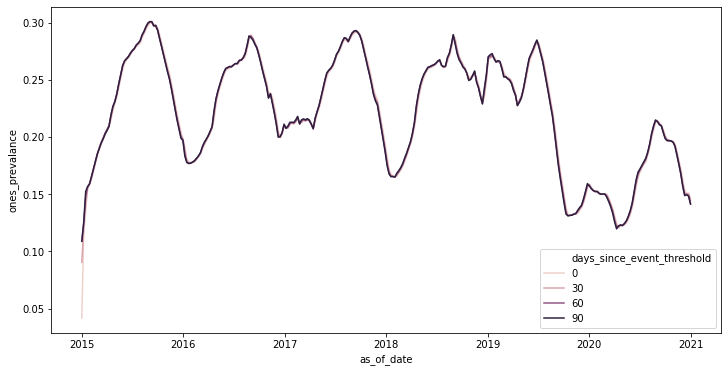

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))
label_msk = df['label_timespan'] == '1year'

temp = pd.DataFrame()
temp['ones_prevalance'] = df[label_msk]['ones_prevalance'].rolling(window=60, min_periods=1).mean()
temp['as_of_date'] = df[label_msk]['as_of_date']
temp['days_since_event_threshold'] = df[label_msk]['days_since_event_threshold']

sns.lineplot(data=temp, x='as_of_date', y='ones_prevalance', hue='days_since_event_threshold')

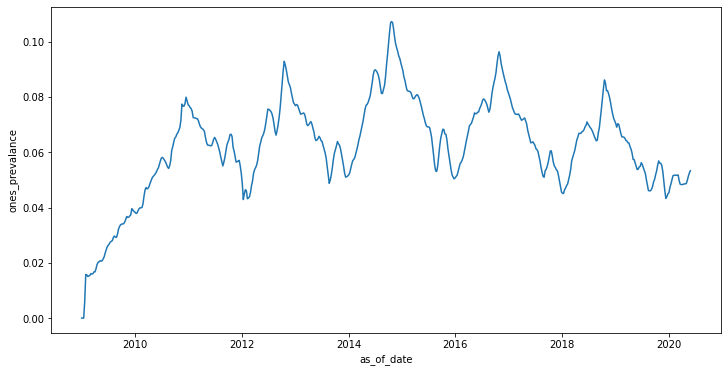

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
label_msk = (df['label_timespan'] == '4week') & (df['days_since_event_threshold'] == 30)
 

temp = pd.DataFrame()

temp['ones_prevalance'] = df[label_msk]['ones_prevalance'].rolling(window=60, min_periods=1).mean()
temp['as_of_date'] = df[label_msk]['as_of_date']
temp['days_since_event_threshold'] = df[label_msk]['days_since_event_threshold']

sns.lineplot(data=temp, x='as_of_date', y='ones_prevalance')

Text(0.5, 1.0, 'Prevalance of ones across time with different inactivity periods--label window 2week')

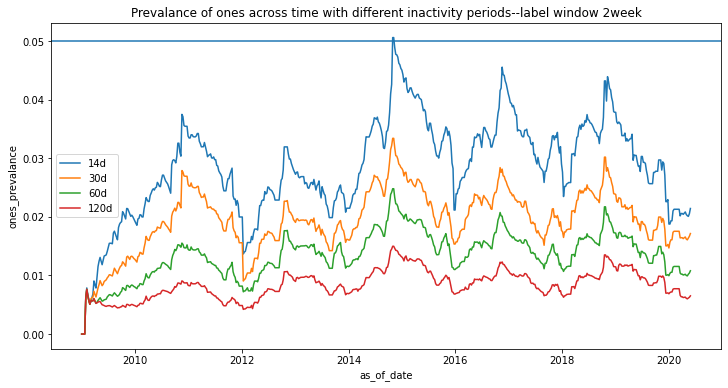

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
label_msk1 = (df['label_timespan'] == '1week') & (df['days_since_event_threshold'] == 14) 
label_msk2 = (df['label_timespan'] == '1week') & (df['days_since_event_threshold'] == 30) 
label_msk3 = (df['label_timespan'] == '1week') & (df['days_since_event_threshold'] == 60) 
label_msk4 = (df['label_timespan'] == '1week') & (df['days_since_event_threshold'] == 120) 

temp1 = pd.DataFrame()
temp2 = pd.DataFrame()
temp3 = pd.DataFrame()
temp4 = pd.DataFrame()
temp1['ones_prevalance'] = df[label_msk1]['ones_prevalance'].rolling(window=60, min_periods=1).mean()
temp1['as_of_date'] = df[label_msk1]['as_of_date']
temp1['days_since_event_threshold'] = df[label_msk1]['days_since_event_threshold']

temp2['ones_prevalance'] = df[label_msk2]['ones_prevalance'].rolling(window=60, min_periods=1).mean()
temp2['as_of_date'] = df[label_msk2]['as_of_date']
temp2['days_since_event_threshold'] = df[label_msk2]['days_since_event_threshold']

temp3['ones_prevalance'] = df[label_msk3]['ones_prevalance'].rolling(window=60, min_periods=1).mean()
temp3['as_of_date'] = df[label_msk3]['as_of_date']
temp3['days_since_event_threshold'] = df[label_msk3]['days_since_event_threshold']

temp4['ones_prevalance'] = df[label_msk4]['ones_prevalance'].rolling(window=60, min_periods=1).mean()
temp4['as_of_date'] = df[label_msk4]['as_of_date']
temp4['days_since_event_threshold'] = df[label_msk4]['days_since_event_threshold']

sns.lineplot(data=temp1, x='as_of_date', y='ones_prevalance', label='14d', ax=ax)
sns.lineplot(data=temp2, x='as_of_date', y='ones_prevalance', label='30d', ax=ax)
sns.lineplot(data=temp3, x='as_of_date', y='ones_prevalance', label='60d', ax=ax)
sns.lineplot(data=temp4, x='as_of_date', y='ones_prevalance', label='120d', ax=ax)
plt.axhline(y=0.05)
ax.set_title('Prevalance of ones across time with different inactivity periods--label window {}'.format('2week'))

In [34]:
def plot_data_over_time(df, label_window, inactive_period, rolling_mean_window, plot_column, ax, target_prevalence=0.05):    
    for ip in inactive_period:
        label_msk = (df['label_timespan'] == label_window) & (df['days_since_event_threshold'] == ip) 
        temp = pd.DataFrame()
#         temp['ones_prevalance'] = df[label_msk]['ones_prevalance'].rolling(window=rolling_mean_window, min_periods=1).mean()
        temp[plot_column] = df[label_msk][plot_column].rolling(window=rolling_mean_window, min_periods=1).mean()
        temp['as_of_date'] = df[label_msk]['as_of_date']
        temp['days_since_event_threshold'] = df[label_msk]['days_since_event_threshold']

        sns.lineplot(data=temp, x='as_of_date', y=plot_column, label=str(ip)+'_days', ax=ax)
        plt.axhline(y=target_prevalence)
        ax.set_title('{} across time for different inactivity periods--label window {}. \n (rolling mean {}-days)'.format(
            plot_column, label_window, rolling_mean_window
        ))


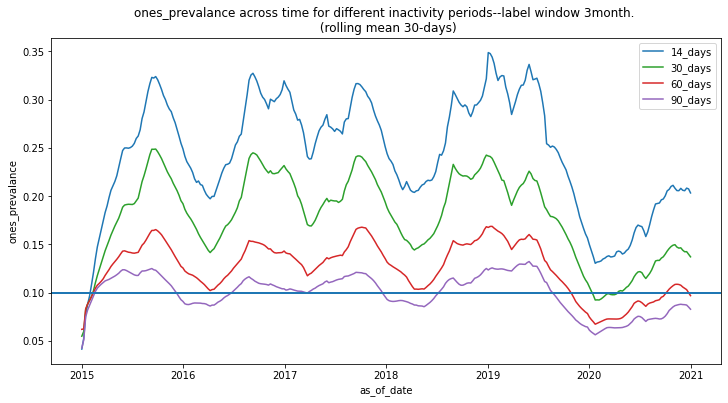

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_data_over_time(
    df=df,
    label_window='3month',
    inactive_period=[14, 21, 30, 60, 90, 120],
    rolling_mean_window=30,
    plot_column='ones_prevalance',
    ax=ax,
    target_prevalence=0.10
)

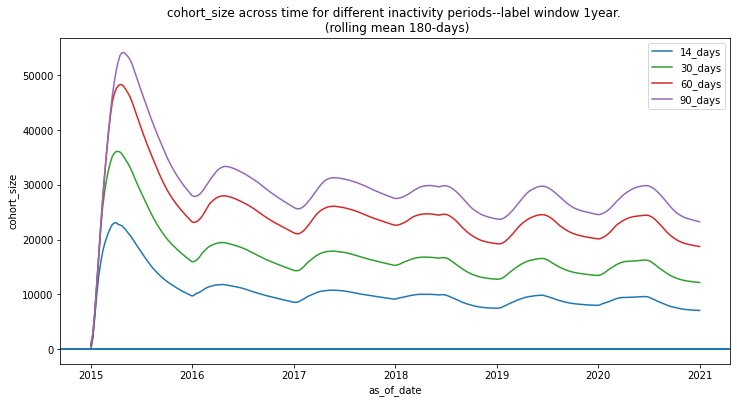

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_data_over_time(
    df=df,
    label_window='1year',
    inactive_period=[14, 21, 30, 60, 90, 120],
    rolling_mean_window=180,
    plot_column='cohort_size',
    ax=ax,
    target_prevalence=0.1
)